In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
#https://github.com/mwv/zca
from zca.zca import zca
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import scipy
import numpy as np
import scipy.stats as st
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV

In [4]:

exclude = 'States'
all_data = pd.read_csv('../data/raw/states.csv')

X = all_data[set(all_data.columns).difference([exclude])].copy()
display(X.describe())
X.index=all_data[exclude]
display(X)

,White,Income,Poverty,University,Traf Deaths,Unemployed,Infant Mort,Crime,Doctors,Population
count,50.00000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,81.96200,51985.100000,12.732000,26.940000,1.40440,5.270000,6.830000,407.480000,260.276000,6.016154e+06
std,11.97458,8592.657934,2.939002,4.761152,0.38654,1.253933,1.338786,183.633868,64.363415,6.663772e+06
min,29.70000,37790.000000,7.600000,17.100000,0.76000,3.000000,4.700000,118.000000,168.800000,5.232260e+05
25%,76.15000,46161.250000,10.450000,24.025000,1.14000,4.400000,5.725000,278.250000,218.425000,1.779632e+06
50%,84.55000,50173.000000,12.400000,26.200000,1.37500,5.300000,6.850000,345.500000,249.050000,4.313980e+06
75%,89.85000,56903.000000,14.700000,29.825000,1.62000,6.275000,7.750000,520.000000,274.800000,6.490796e+06
max,96.40000,70545.000000,21.200000,38.100000,2.45000,8.400000,10.600000,788.000000,469.000000,3.618591e+07


,White,Income,Poverty,University,Traf Deaths,Unemployed,Infant Mort,Crime,Doctors,Population
States,,,,,,,,,,
Alabama,71.0,42666,15.7,22.0,1.81,5.0,9.0,448,218.2,4634063
Alaska,70.6,68460,8.4,27.3,1.63,6.7,6.9,661,228.5,679893
Arizona,86.5,50958,14.7,25.1,1.69,5.5,6.4,483,209.7,6360238
Arkansas,80.8,38815,17.3,18.8,1.96,5.1,8.5,529,203.4,2841595
California,76.6,61021,13.3,29.6,1.21,7.2,5.0,523,268.7,36185908
Colorado,89.7,56993,11.4,35.6,1.14,4.9,5.7,348,259.7,4837229
Connecticut,84.3,68595,9.3,35.6,0.86,5.7,6.2,256,376.4,3488084
Delaware,74.3,57989,10.0,27.5,1.23,4.8,8.3,689,250.9,865314
Florida,79.8,47778,13.2,25.8,1.56,6.2,7.3,723,247.9,18262096


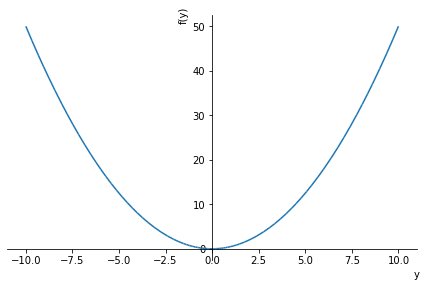

In [1]:
#integral of e^((-t^2)/2) from negative infinity to 11
#https://www.wolframalpha.com/input/?i=integral+of+e%5E%28%28-t%5E2%29%2F2%29+from+negative+infinity+to+11&fbclid=IwAR2734hgH3UpMEtt_A1JgWt7CrstT1QtHZm517HyqspNwMpwBZX3PmwdXos

#Use spyder
import math
from sympy import *
import scipy
import numpy as np


init_printing()
var('x,y')

x = 0
while x < np.inf:
    #print(x)
    x += 1
    if x == 11:

        break
else:
    y=math.e^(x^2/2)
    
integrate(y)

plot(integrate(y))


In [100]:
def ecdf2(values):
        co = len(values)
        externalArray = pd.DataFrame()
        for d in range(0,len(values.columns)):
            internalArray = []
            for i in range(0,len(values.iloc[:,d])):
                a = ( \
                    sum( ( values.iloc[:,d] <= values.iloc[:,d][i] ) ) + \
                    sum( ( values.iloc[:,d] <  values.iloc[:,d][i] ) ) \
                    ) / 2 / co
                print(a)
                internalArray.append(a)

            externalArray = pd.concat([externalArray,pd.DataFrame(internalArray).round(2)],axis=1)

        return(externalArray)


In [85]:
temp = np.array(range(0,10))#
temp = [0,1,2,3,3,3,3,3,3,3,3,4,4,4,5,6,7,8,9]

In [102]:
raw_pct

,0
0,0.03
1,0.08
2,0.13
3,0.37
4,0.37
5,0.37
6,0.37
7,0.37
8,0.37
9,0.37


Poverty
0.02631578947368421
0.07894736842105263
0.13157894736842105
0.3684210526315789
0.3684210526315789
0.3684210526315789
0.3684210526315789
0.3684210526315789
0.3684210526315789
0.3684210526315789
0.3684210526315789
0.6578947368421053
0.6578947368421053
0.6578947368421053
0.7631578947368421
0.8157894736842105
0.868421052631579
0.9210526315789473
0.9736842105263158
bandwidth: 2.32


array([-2.16091877])

array([2.38350241])

Poverty    7.6
dtype: float64

Poverty    21.2
dtype: float64

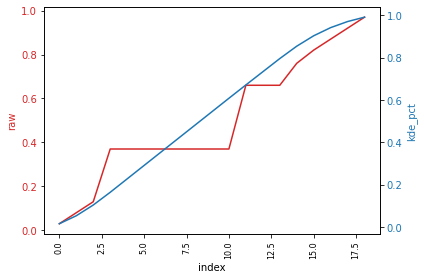

In [101]:
#plt.plot(X['Poverty'].sort_values(kind="quicksort", ascending=True,key=abs))
bandwidths = np.linspace(.01, 4, 20)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                        {'bandwidth': bandwidths},
                        )

kde_pct = pd.DataFrame()
#raw_pct = pd.DataFrame()

#for i in X.columns:
i='Poverty'
print(i)
og = X[[i]].sort_values(kind="quicksort", by=i,ascending=True)
og = pd.DataFrame(temp)
raw_pct = ecdf2(og)
og_pct = og
grid.fit(og_pct)
print("bandwidth: " + str(grid.best_params_['bandwidth']))
kde = KernelDensity(bandwidth=grid.best_params_['bandwidth'], kernel='gaussian')
kde.fit(og_pct)
logprobX = np.cumsum(np.exp(kde.score_samples(og_pct)))/np.sum(np.exp(kde.score_samples(og_pct)))
logprobX = (pd.DataFrame(logprobX).shift(1).replace([np.inf, -np.inf, np.NaN], 0)+pd.DataFrame(logprobX))/2
logprobX.index = og.index
kde_pct = pd.concat([kde_pct,logprobX],axis=1)
#raw_pct = pd.concat([raw_pct,og_pct],axis=1)
display(st.norm.ppf(logprobX)[0])
display(st.norm.ppf(logprobX)[len(logprobX)-1])
display(X[[i]].min())
display(X[[i]].max())

data1 = raw_pct#np.exp(t)
data2 = logprobX#np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('index')
ax1.set_ylabel('raw', color=color)
ax1.plot(data1, color=color)
plt.xticks(rotation = 90,size=8)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('kde_pct', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



The area is 0.0
The area is 1.0
The area is 2.0
The area is 3.0000000000000004
The area is 3.0000000000000004
The area is 3.0000000000000004
The area is 3.0000000000000004
The area is 3.0000000000000004
The area is 3.0000000000000004
The area is 3.0000000000000004
The area is 3.0000000000000004
The area is 4.0
The area is 4.0
The area is 4.0
The area is 5.000000000000001
The area is 6.000000000000001
The area is 7.000000000000001
The area is 8.0
The area is 9.000000000000002


c:\users\user\appdata\local\programs\python\python39\jupyterlab\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\users\user\appdata\local\programs\python\python39\jupyterlab\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\users\user\appdata\local\programs\python\python39\jupyterlab\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:

In [29]:
import numpy as np
from sklearn.metrics import auc
from sklearn import metrics

dx = 5
#xx = np.arange(1,100,dx)
#yy = np.arange(1,100,dx)
xx = X['Poverty'].sort_values(kind="quicksort", ascending=True,key=abs)
yy = np.full((1,len(X)), 1).ravel()

print('computed AUC using sklearn.metrics.auc: {}'.format(auc(xx,yy)))
fpr, tpr, thresholds = metrics.roc_curve(xx, yy, pos_label=2)
auc(fpr, tpr)
#print('computed AUC using np.trapz: {}'.format(np.trapz(yy, dx = dx)))

computed AUC using sklearn.metrics.auc: 13.6


ValueError: continuous format is not supported